In [ ]:
!pip install bing-image-downloader
#installing image scraper

In [ ]:
ls

In [ ]:
#scraping Pizza and Burger images for classification
from bing_image_downloader import downloader
downloader.download("Pizza", limit = 30, output_dir ="images")
downloader.download("Burger", limit = 30, output_dir ="images")



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.gannett-cdn.com/-mm-/3c038894d19f4baf91f63e457dfc1da1eb02b936/c=0-201-2160-1421&amp;r=x1803&amp;c=3200x1800/local/-/media/2015/01/12/USATODAY/USATODAY/635566745150462086-XXX-Pizza-Hut-gluten-free-pizza.jpg
[!] Issue getting: http://www.gannett-cdn.com/-mm-/3c038894d19f4baf91f63e457dfc1da1eb02b936/c=0-201-2160-1421&amp;r=x1803&amp;c=3200x1800/local/-/media/2015/01/12/USATODAY/USATODAY/635566745150462086-XXX-Pizza-Hut-gluten-free-pizza.jpg
[!] Error:: HTTP Error 403: Forbidden
[%] Downloading Image #1 from https://i.ytimg.com/vi/CxZM0PM77Us/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/H5TVA1_6n7U/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/b/b8/Thin_crust_Roman_style_pizza_on_table.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/JdIQL1-7

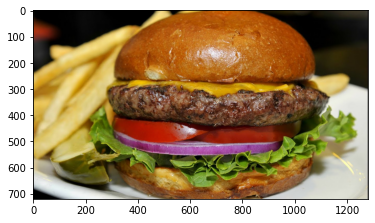

In [37]:
#PreProcessing the data
path = '/content/drive/My Drive/proj/images/Burger/Image_1.jpg'
import cv2
import matplotlib.pyplot as plt

i = cv2.imread(path)
i = cv2.cvtColor(i,cv2.COLOR_BGR2RGB)
plt.imshow(i)

In [38]:
#Flattening the image
import os
from skimage.io import imread
from skimage.transform import resize

target = []
flat_data  = []
images = []

path = '/content/drive/My Drive/proj/images/'

for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resize = resize(img,(50,50))
    flat_data.append(img_resize.flatten())
    images.append(flat_data)

In [59]:
#Making dataframe for our data
import pandas as pd

df = pd.DataFrame(flat_data)
df['Target'] = target
#df.head()

In [40]:
#Testing and training data
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:7500]
Y = target
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [41]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [42]:
#HyperParameter tuning
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.444, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.889, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [43]:
#Finding best parametrs
print(grid.best_params_) 
  
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [46]:
#Predicting values
y_pred = grid.predict(X_test)
y_pred

array(['Burger', 'Burger', 'Pizza', 'Burger', 'Pizza', 'Pizza', 'Pizza',
       'Pizza', 'Burger', 'Pizza', 'Burger', 'Pizza', 'Pizza', 'Burger',
       'Burger'], dtype='<U6')

In [49]:
#Getting measure of accuracy
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9333333333333333
[[7 0]
 [1 7]]


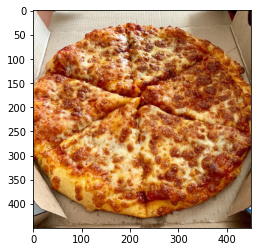

In [52]:
#Getting a random image of a Pizza and a burger for prediction
from skimage.io import imread
import matplotlib.pyplot as plt

i1 = imread('https://media-cdn.tripadvisor.com/media/photo-s/15/2d/23/07/domino-s-pizza.jpg')
plt.imshow(i1)

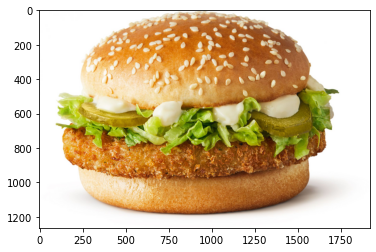

In [53]:
i2 = imread('https://www.franchisebusiness.com.au/app/uploads/2020/01/McVeggie-1920x1264.jpg')
plt.imshow(i2)

In [84]:
flat_tests = []
print(flat_tests)

[]


In [85]:
#Preprocessing data to predict
resized_test1 =  resize(i1,(50,50))
#print(resized_test1)
rt = resized_test1.flatten()
flat_tests.append(rt)
resized_test2 =  resize(i2,(50,50))
flat_tests.append(resized_test2.flatten())
print(flat_tests)


[array([0.87058824, 0.83137255, 0.78039216, ..., 0.12941176, 0.01960784,
       0.00784314]), array([0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
       0.99607843])]


In [87]:
#Making dataframe to predict
y_ans = ['Pizza','Burger']
df_t = pd.DataFrame(flat_tests)
X_t = df_t.iloc[:,:]
X_t

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7460,7461,7462,7463,7464,7465,7466,7467,7468,7469,7470,7471,7472,7473,7474,7475,7476,7477,7478,7479,7480,7481,7482,7483,7484,7485,7486,7487,7488,7489,7490,7491,7492,7493,7494,7495,7496,7497,7498,7499
0,0.870588,0.831373,0.780392,0.745098,0.564706,0.478431,0.698039,0.494118,0.407843,0.662745,0.458824,0.372549,0.643137,0.494118,0.411765,0.737255,0.686275,0.611765,0.784314,0.745098,0.674510,0.807843,0.772549,0.701961,0.811765,0.776471,0.705882,0.823529,0.796078,0.725490,0.839216,0.811765,0.741176,0.854902,0.827451,0.756863,0.870588,0.847059,0.776471,0.882353,...,0.545098,0.760784,0.666667,0.545098,0.772549,0.674510,0.556863,0.772549,0.670588,0.556863,0.772549,0.678431,0.560784,0.772549,0.682353,0.568627,0.745098,0.650980,0.529412,0.678431,0.580392,0.454902,0.529412,0.423529,0.298039,0.388235,0.286275,0.160784,0.282353,0.180392,0.058824,0.207843,0.098039,0.015686,0.160784,0.050980,0.007843,0.129412,0.019608,0.007843
1,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078


In [89]:
#Checking what the prediction is. It matches with the data supplied !! :)
y_p = grid.predict(X_t)
print(y_p)

['Pizza' 'Burger']
